C:\Users\shogu\Anaconda2\lib\site-packages\ipykernel\__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\shogu\Anaconda2\lib\site-packages\ipykernel\__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Feature ranking:
1. Word Count (0.101524)
2. Watson Conscientiousness (0.068038)
3. Watson Agreeableness (0.066726)
4. Watson Disgust (0.064005)
5. Watson Extraversion (0.063241)
6. Watson Joy (0.061542)
7. Watson Anger (0.061400)
8. Watson Openness (0.059713)
9. Watson Sadness (0.059207)
10. Grammer Errors (0.058799)
11. Watson Emotional Range (0.058307)
12. Watson Fear (0.057554)
13. Time of Day (0.049287)
14. Watson Analytical (0.047827)
15. Watson Tenative (0.040237)
16. Bad Words (0.028791)
17. Watson Confident (0.027365)
18. Contains MD (0.026438)


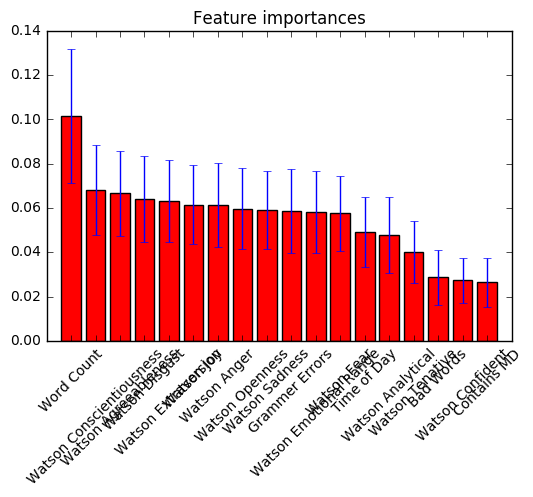

0.619897959184


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scripts import Munger as mg

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

traindata = pd.read_csv('./mytrain/addedAdviceAnimals_train.csv')
testdata = pd.read_csv('./mytest/addedAdviceAnimals_test.csv')

traindata['body'] = traindata['body'].astype(str)
testdata['body'] = testdata['body'].astype(str)

# Munge data
traindata['edited'] = traindata['edited'].astype(bool)
testdata['edited'] = testdata['edited'].astype(bool)

todmap = {
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3,
    'Morning': 4
}

scoremap = {
    'Under 0': 1,
    '0-20': 2,
    '21-40': 3,
    '41-60': 4,
    '61+':5
}

labelmap = {
    'pos': 1,
    'neg': 2,
    'neutral': 3
}



trainX = traindata[[ 'Contains MD', 'Word Count', 'Time of Day', 'Watson Anger','Watson Disgust','Watson Fear',
                    'Watson Joy','Watson Sadness','Watson Analytical','Watson Confident','Watson Tenative',
                    'Watson Openness','Watson Conscientiousness','Watson Extraversion','Watson Agreeableness',
                    'Watson Emotional Range', 'Bad Words', 'Grammer Errors']]

trainX['Time of Day'] = trainX['Time of Day'].map(todmap)
# trainX['Score Classified'] = trainX['Score Classified'].map(scoremap)
# trainX['Sentiment Label'] = trainX['Sentiment Label'].map(labelmap)
trainy = traindata['gilded']


testX = testdata[[ 'Contains MD', 'Word Count', 'Time of Day', 'Watson Anger','Watson Disgust','Watson Fear',
                    'Watson Joy','Watson Sadness','Watson Analytical','Watson Confident','Watson Tenative',
                    'Watson Openness','Watson Conscientiousness','Watson Extraversion','Watson Agreeableness',
                    'Watson Emotional Range', 'Bad Words', 'Grammer Errors']]

testX['Time of Day'] = testX['Time of Day'].map(todmap)
# trainX['Score Classified'] = testX['Score Classified'].map(scoremap)
# testX['Sentiment Label'] = testX['Sentiment Label'].map(labelmap)
testy = testdata['gilded']




                            
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(trainX, trainy)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(trainX.shape[1]):
    print '%d.' % (f + 1), trainX.columns.values[indices[f]], '(%f)' % importances[indices[f]]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(trainX.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainX.shape[1]), [ trainX.columns.values[i] for i in indices], rotation=45)
plt.xlim([-1, trainX.shape[1]])
plt.show()

print(forest.score(testX, testy))

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(traindata['body'])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

labels = kmeans.labels_
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), cmap=plt.cm.Paired, s=200)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

['__abs__', '__add__', '__array_priority__', '__bool__', '__class__', '__delattr__', '__dict__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__matmul__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__numpy_ufunc__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmatmul__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_binopt', '_boolean_index_to_array', '_check_boolean', '_check_ellipsis', '_cs_matrix__get_has_canonical_format', '_cs_matrix__get_sorted', '_cs_matrix__set_has_canonical_format', '_cs_matrix__set_sorted', '_deduped_data', '_divide', '_divide_sparse', '_get_dtype', '_get_row_slice', '_get_single_elem

ValueError: Color array must be two-dimensional